# Explore here

In [269]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.datasets import make_regression
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [270]:
#Importamos los datos
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


EDA

In [271]:
data.info() #12 columnas (variables) y 1599 lineas (observaciones)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [272]:
data.isnull().sum() #Vemos que no existe ningún valor nuelo en el DataFrame

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No tiene sentido eliminar valores duplicados, ya que al ser valores númericos no exclusivos estos se pueden repetir a lo lardo del dataset.

Análisis sobre variables numéricas

Voy a analizar directamente el boxplot para poder observar los outliers

In [273]:
type(data)

pandas.core.frame.DataFrame

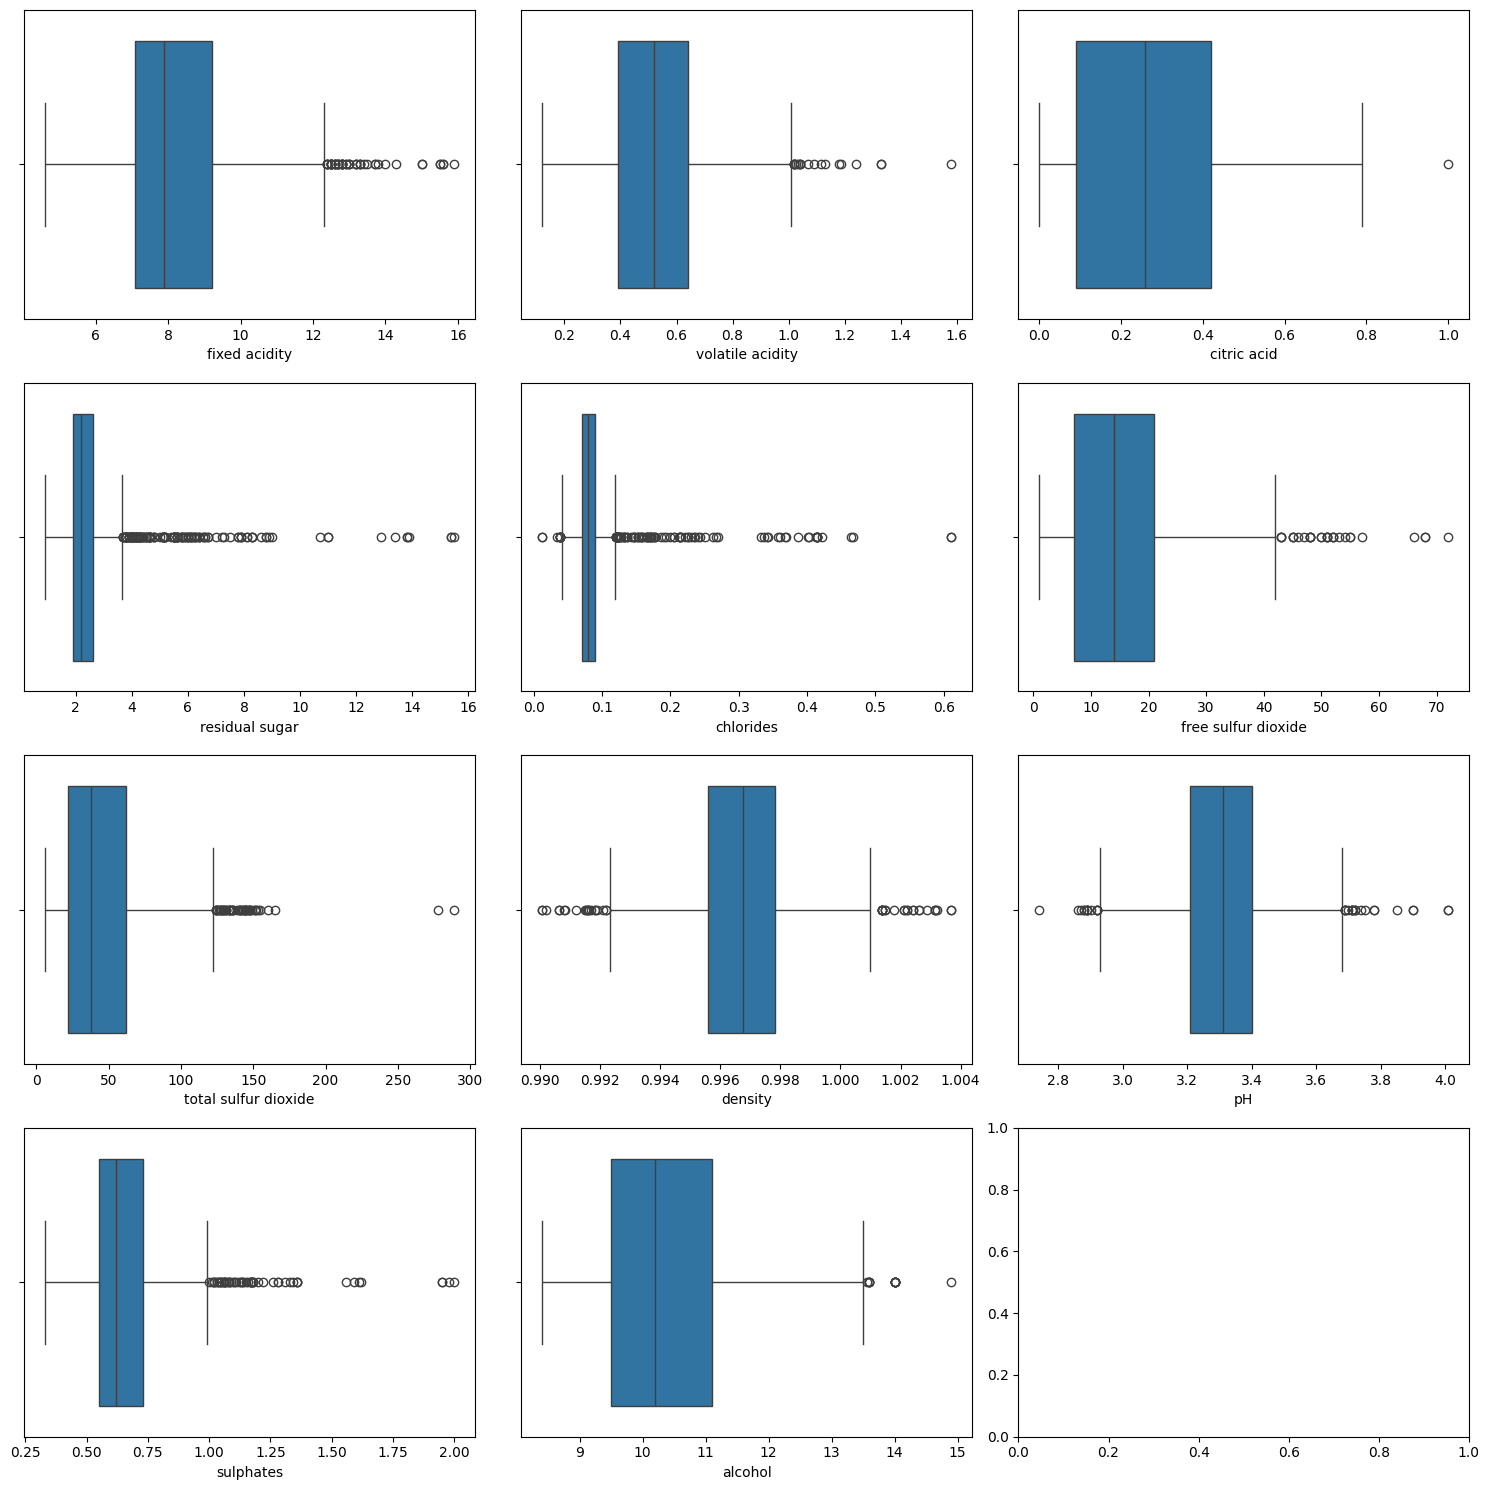

In [274]:
fig, axis = plt.subplots(4,3, figsize=(15,15))

sns.boxplot(data = data, ax=axis[0,0], x="fixed acidity")
sns.boxplot(data = data, ax=axis[0,1], x="volatile acidity")
sns.boxplot(data = data, ax=axis[0,2], x="citric acid")
sns.boxplot(data = data, ax=axis[1,0], x="residual sugar")
sns.boxplot(data = data, ax=axis[1,1], x="chlorides")
sns.boxplot(data = data, ax=axis[1,2], x="free sulfur dioxide")
sns.boxplot(data = data, ax=axis[2,0], x="total sulfur dioxide")
sns.boxplot(data = data, ax=axis[2,1], x="density")
sns.boxplot(data = data, ax=axis[2,2], x="pH")
sns.boxplot(data = data, ax=axis[3,0], x="sulphates")
sns.boxplot(data = data, ax=axis[3,1], x="alcohol")

plt.tight_layout()
plt.show()

Eliminación de outliers

In [275]:
#Elimino el único outlier de citric acid
data = data[data["citric acid"]<0.8]

In [276]:
#Elimino los datos más extremos de sulphates que son los que existen a partir de 1.50
data = data[data["sulphates"] < 1.50]

In [277]:
#Igual para total sulfur dioxide
data = data[data["total sulfur dioxide"] < 200]

In [278]:
#Chlorides
chlorides_stats = data["chlorides"].describe()
chlorides_stats

count    1589.000000
mean        0.086819
std         0.044349
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

In [279]:
chlorides_iqr = chlorides_stats["75%"] - chlorides_stats["25%"]
upper_limit = chlorides_stats["75%"] + 1.5 * chlorides_iqr
lower_limit = chlorides_stats["25%"] - 1.5 * chlorides_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(chlorides_iqr, 2)}")


Los límites superior e inferior para la búsqueda de outliers son 0.12 y 0.04, con un rango intercuartílico de 0.02


In [280]:
data = data[data["chlorides"] <= 0.4]

In [281]:
#Residual sugar
res_sugar_stats = data["residual sugar"].describe()
res_sugar_stats

count    1577.000000
mean        2.539727
std         1.402250
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [282]:
res_sugar_iqr = res_sugar_stats["75%"] - res_sugar_stats["25%"]
upper_limit_sugar = res_sugar_stats["75%"] + 1.5 * res_sugar_iqr
lower_limit_sugar = res_sugar_stats["25%"] - 1.5 * res_sugar_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_sugar, 2)} y {round(lower_limit_sugar, 2)}, con un rango intercuartílico de {round(res_sugar_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.65 y 0.85, con un rango intercuartílico de 0.7


In [283]:
data = data[data["residual sugar"] <  3.65]

Análisis de correlación variables independientes con variable dependiente

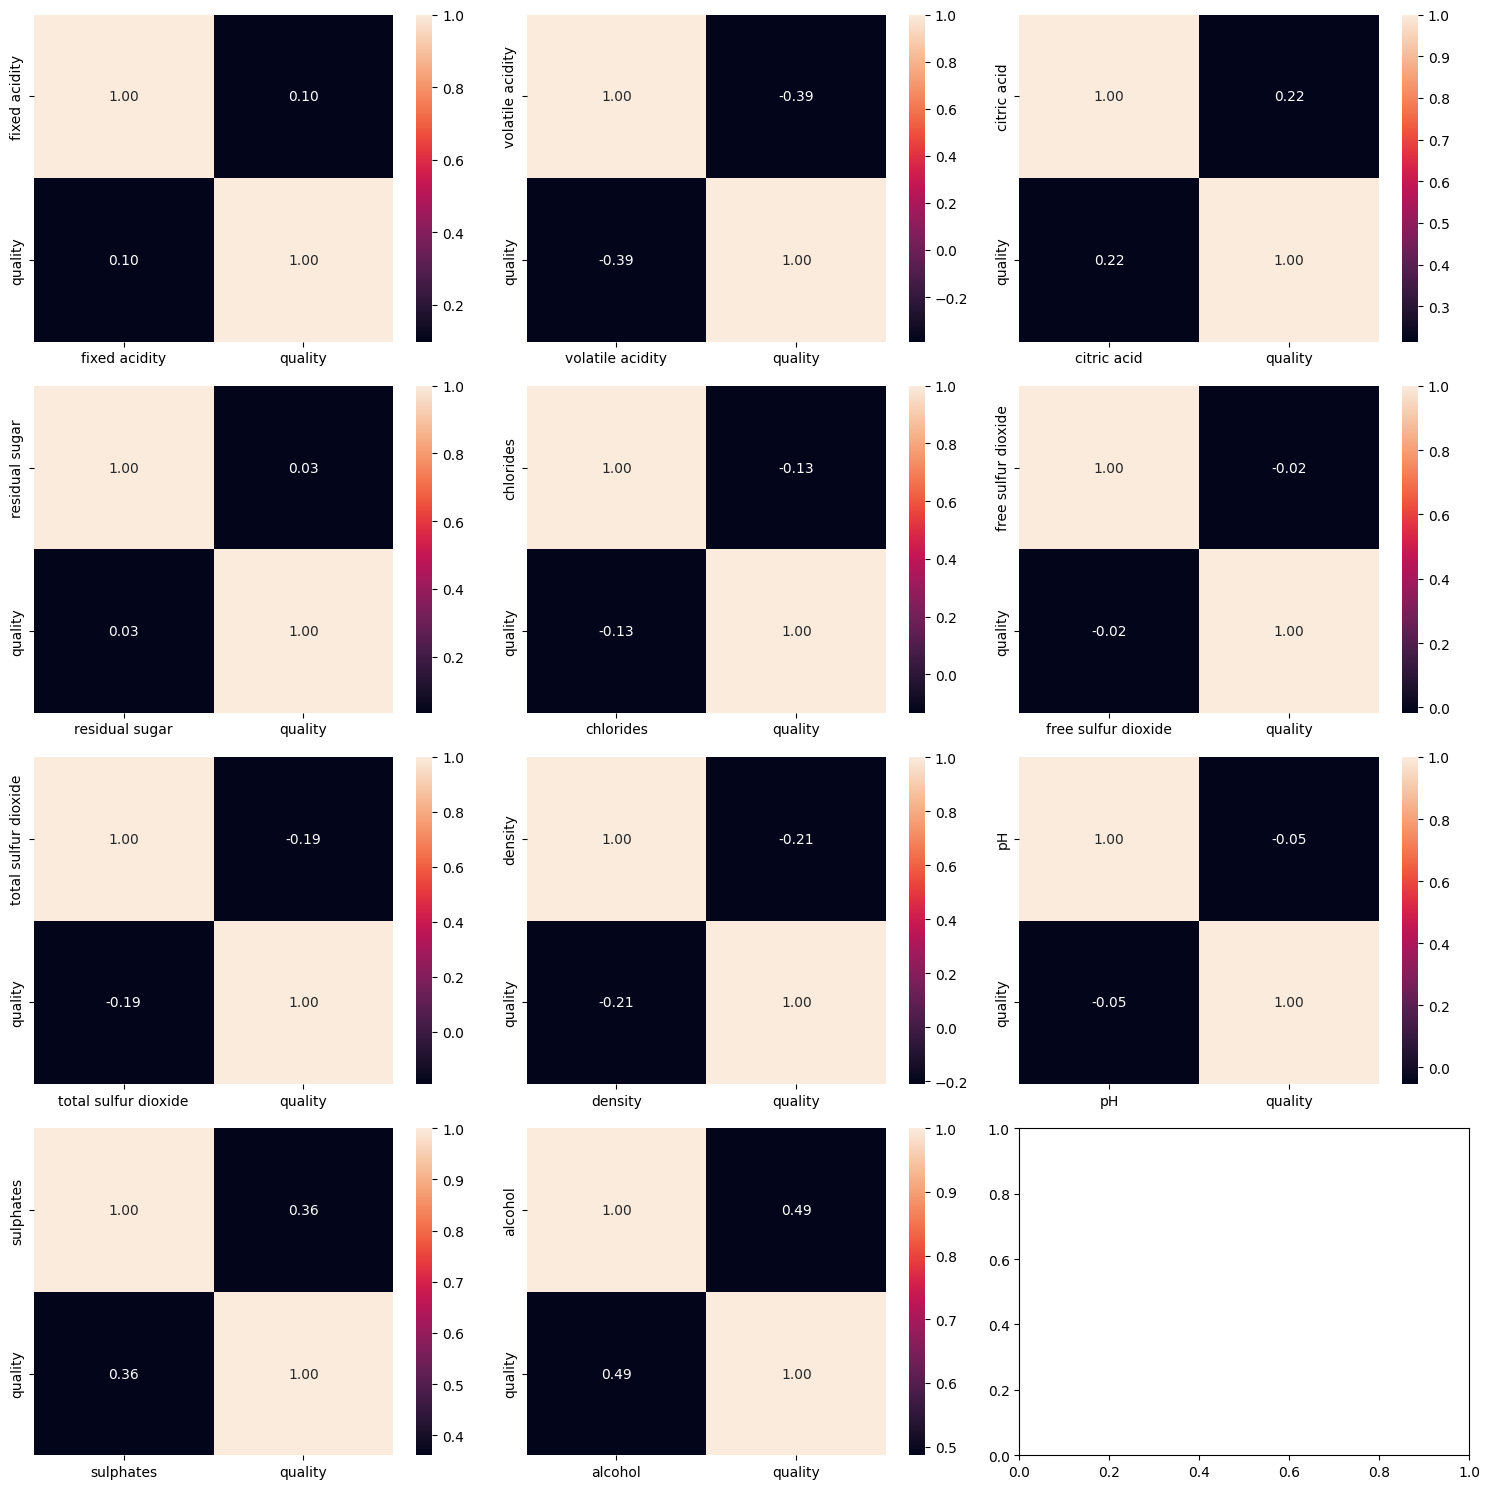

In [284]:
fig, axis = plt.subplots(4,3, figsize=(15,15))

sns.heatmap(data[["fixed acidity", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[0,0])
sns.heatmap(data[["volatile acidity", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[0,1])
sns.heatmap(data[["citric acid", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[0,2])
sns.heatmap(data[["residual sugar", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0])
sns.heatmap(data[["chlorides", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])
sns.heatmap(data[["free sulfur dioxide", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[1,2])
sns.heatmap(data[["total sulfur dioxide", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[2,0])
sns.heatmap(data[["density", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[2,1])
sns.heatmap(data[["pH", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[2,2])
sns.heatmap(data[["sulphates", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[3,0])
sns.heatmap(data[["alcohol", "quality"]].corr(), annot = True, fmt = ".2f", ax = axis[3,1])

plt.tight_layout()
plt.show()

Vemos como las variables con mayor correlación con la calidad del vino son (en orden ascendente):
- alcohol (positiva)
- volatile acidity (negativa)
- sulphates (positiva)

El resto de variables no tienen tanta correlación como para suponer relevantes en un principio

In [285]:
X = data.drop(["quality"], axis=1)
y = data["quality"]

In [286]:
y.unique()

array([5, 6, 7, 4, 8, 3])

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1279,9.8,0.30,0.39,1.7,0.062,3.0,9.0,0.99480,3.14,0.57,11.5
41,8.8,0.61,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.3
241,12.0,0.38,0.56,2.1,0.093,6.0,24.0,0.99925,3.14,0.71,10.9
985,7.4,0.58,0.00,2.0,0.064,7.0,11.0,0.99562,3.45,0.58,11.3
1591,5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6


In [288]:
#Escalamos los valores de X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=X_test.columns)

In [289]:
X_test_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1334,0.250000,0.489726,0.000000,0.407407,0.410667,0.053571,0.031447,0.530450,0.456140,0.184466,0.272727
773,0.317308,0.191781,0.386667,0.333333,0.386667,0.000000,0.238994,0.638129,0.377193,0.572816,0.181818
1219,0.423077,0.184932,0.533333,0.148148,0.085333,0.428571,0.276730,0.415711,0.289474,0.485437,0.436364
1134,0.375000,0.109589,0.466667,0.296296,0.130667,0.089286,0.056604,0.456311,0.377193,0.398058,0.600000
1062,0.326923,0.178082,0.586667,0.370370,0.229333,0.089286,0.056604,0.488085,0.377193,0.300971,0.527273


In [290]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [291]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [292]:
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

classification_report_test = classification_report(y_test, y_test_pred)
classification_report_train = classification_report(y_train, y_train_pred)


print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)

Accuracy Test:  0.47719298245614034
Accuracy Train:  0.812829525483304


In [293]:
print("Confusion Matrix Test: \n",  confusion_matrix_test)
print("Confusion Matrix Train: \n", confusion_matrix_train)

Confusion Matrix Test: 
 [[ 0  0  1  1  0  0]
 [ 4  0  5  2  0  0]
 [ 1  6 86 21  2  0]
 [ 1  9 59 45  8  0]
 [ 0  2  6 16  5  0]
 [ 0  1  2  2  0  0]]
Confusion Matrix Train: 
 [[  6   0   0   0   0   0]
 [  1  31   0   0   0   0]
 [  2   8 476   0   0   0]
 [  1  11 121 330   0   0]
 [  1   3  15  41  80   0]
 [  0   0   1   5   3   2]]


In [294]:
print("Classification Report Test: \n", classification_report_test)
print("Classification Report Train: \n", classification_report_train)

Classification Report Test: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.54      0.74      0.63       116
           6       0.52      0.37      0.43       122
           7       0.33      0.17      0.23        29
           8       0.00      0.00      0.00         5

    accuracy                           0.48       285
   macro avg       0.23      0.21      0.21       285
weighted avg       0.48      0.48      0.46       285

Classification Report Train: 
               precision    recall  f1-score   support

           3       0.55      1.00      0.71         6
           4       0.58      0.97      0.73        32
           5       0.78      0.98      0.87       486
           6       0.88      0.71      0.79       463
           7       0.96      0.57      0.72       140
           8       1.00      0.18      0.31        11

    accuracy    

Cambiamos K

In [295]:
k_numbers = np.arange(2,21)
scores = []

for k in k_numbers:
    model_2 = KNeighborsClassifier(n_neighbors=k)
    model_2.fit(X_train, y_train)
    scores.append(model_2.score(X_train, y_train))

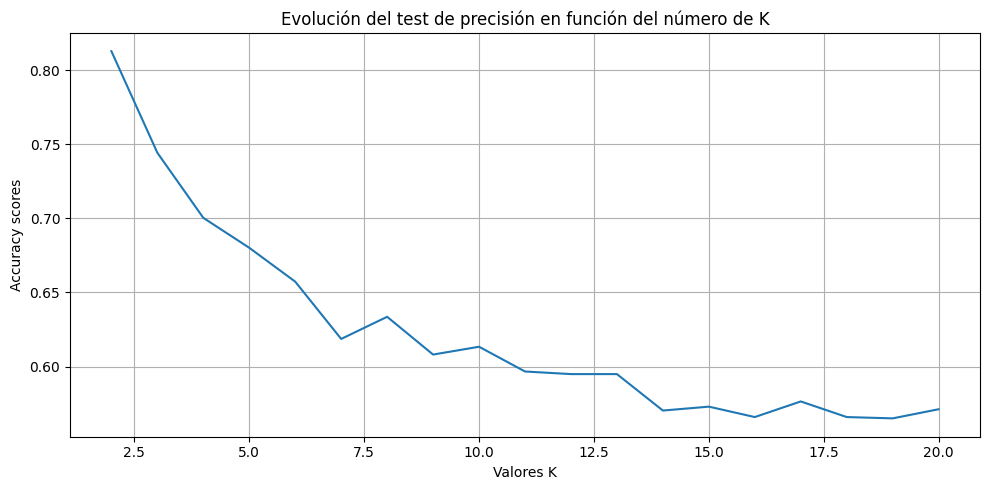

In [296]:
fig, axis = plt.subplots(figsize=(10,5))

sns.lineplot(x=k_numbers, y=scores)
plt.ylabel("Accuracy scores")
plt.xlabel("Valores K")
plt.title("Evolución del test de precisión en función del número de K")
plt.grid()

plt.tight_layout()
plt.show()

Vemos como a medida que incluímos un mayor número de k (k-neighbours) vemos que el test de precisión se reduce. No obstante, al aumentar el número de k el modelo es menos sensible a posibles outliers.